In [28]:
import pandas as pd
from pathlib import Path
from warnings import simplefilter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")


# Federal Reserve dataset: https://www.kaggle.com/federalreserve/interest-rates
reserve = pd.read_csv(
    "./datasets/reserve.csv",
    parse_dates={'Date': ['Year', 'Month', 'Day']},
    index_col='Date',
)

In [42]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(15, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [9]:
y = reserve.loc[:, 'Unemployment Rate'].dropna().to_period('M')
df = pd.DataFrame({
    'y': y,
    'y_lag_1': y.shift(1),
    'y_lag_2': y.shift(2),    
})
df.head()


,y,y_lag_1,y_lag_2
Date,,,
1954-07,5.8,NaN,NaN
1954-08,6.0,5.8,NaN
1954-09,6.1,6.0,5.8
1954-10,5.7,6.1,6.0
1954-11,5.3,5.7,6.1


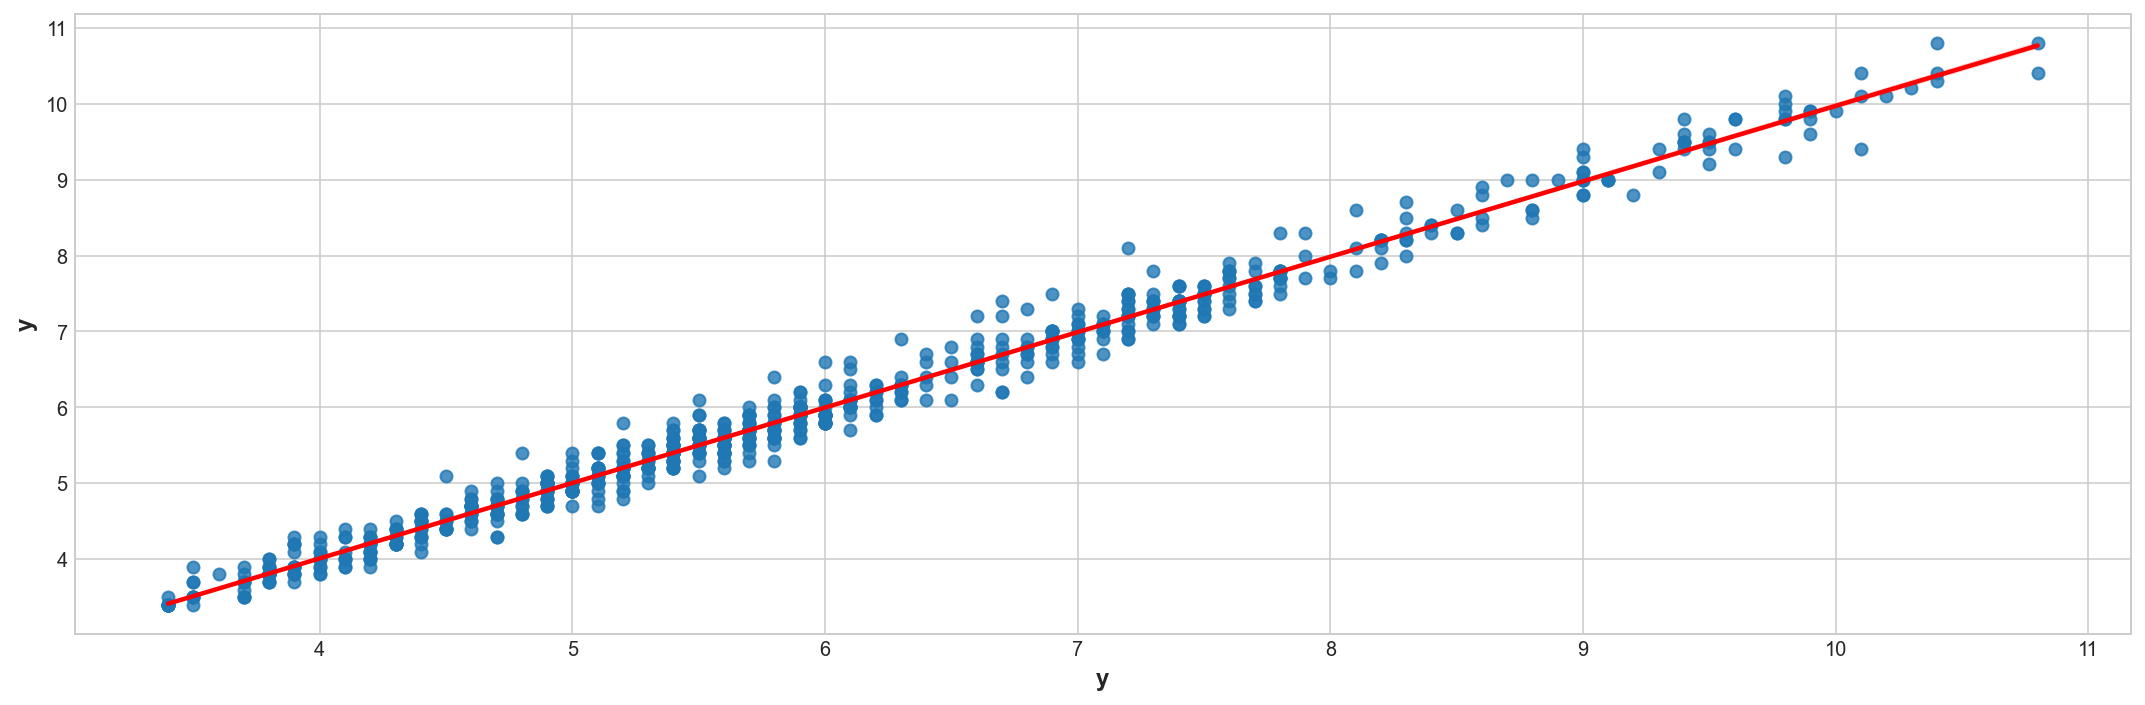

In [51]:
np.round(df['y'].autocorr(lag=1),2)

0.99

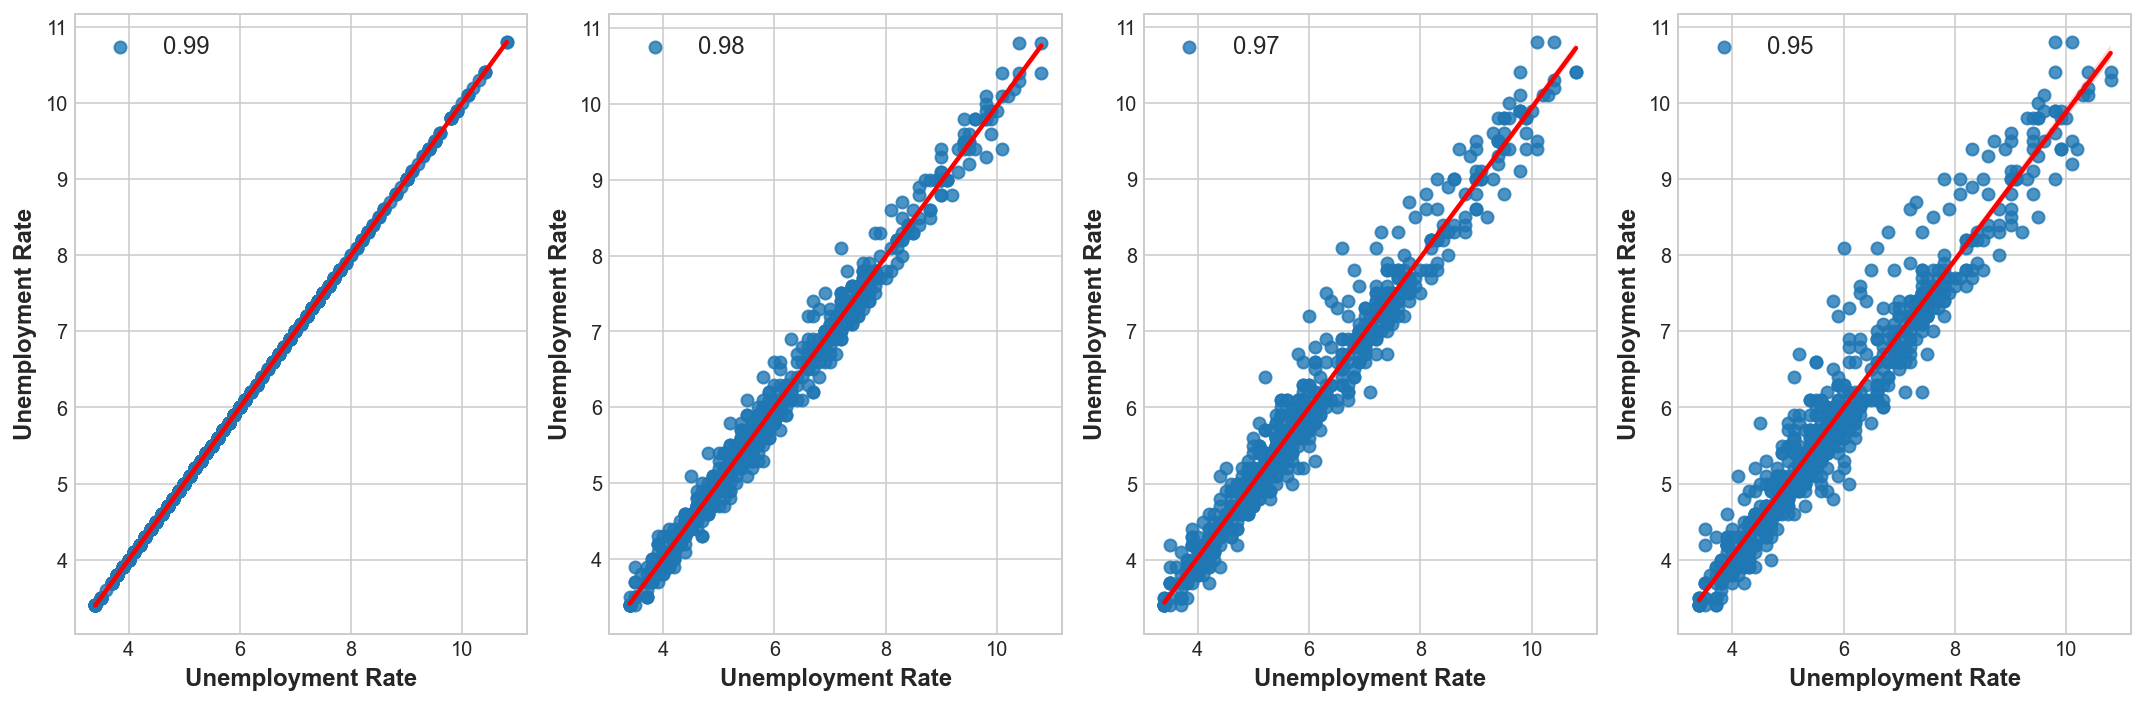

In [57]:
fig, axs = plt.subplots(ncols=4)

for i in range(4):
	_ = sns.regplot(x = df['y'].shift(i), y= df['y'], line_kws={"color": "red"},label=np.round(df['y'].autocorr(lag=i+1),2),ax=axs[i])
	_.axes.set_xlabel("Unemployment Rate")
	_.axes.set_ylabel("Unemployment Rate")
	_.legend(fontsize=12)